In [1]:
from datgan import DATGAN
import datgan

import numpy as np
import pandas as pd
import networkx as nx

# For the Python notebook
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import tensorflow as tf

#tf.config.run_functions_eagerly(True)

In [2]:
df = pd.read_csv('../../data/LTDS/cleaned.csv')

In [3]:
df.head()

,gender,age,ethnicity,hh_borough,hh_people,hh_income,hh_carvan,hh_comp
0,female,36,Asian,Barking and Dagenham,5,25-35k,2,Couple family
1,male,35,Asian,Barking and Dagenham,5,25-35k,2,Couple family
2,female,9,Asian,Barking and Dagenham,5,25-35k,2,Couple family
3,female,6,Asian,Barking and Dagenham,5,25-35k,2,Couple family
4,female,0,Asian,Barking and Dagenham,5,25-35k,2,Couple family


In [4]:
data_info = {
    'age': {
        'type': 'continuous',
        'bounds': [0, 100],
        'discrete': True
    }
}

# Add the other variables as categorical
for c in df.columns:
    if c not in data_info.keys():
        data_info[c] = {'type': 'categorical'}

In [5]:
graph = nx.DiGraph()

graph.add_edges_from([
    ('age', 'hh_comp'),
    ('gender', 'hh_comp'),
    ('ethnicity', 'hh_people'),
    ('hh_borough', 'hh_comp'),
    ('hh_borough', 'hh_carvan'),
    ('hh_borough', 'hh_income'),
    ('hh_comp', 'hh_income'),
    ('hh_comp', 'hh_people'),
    ('hh_income', 'hh_carvan'),
    ('hh_people', 'hh_carvan')
])

Preparing advice...
You might want to add the following edges in your DAG (direction not given here):
  - age <-> hh_people
  - hh_carvan <-> hh_comp


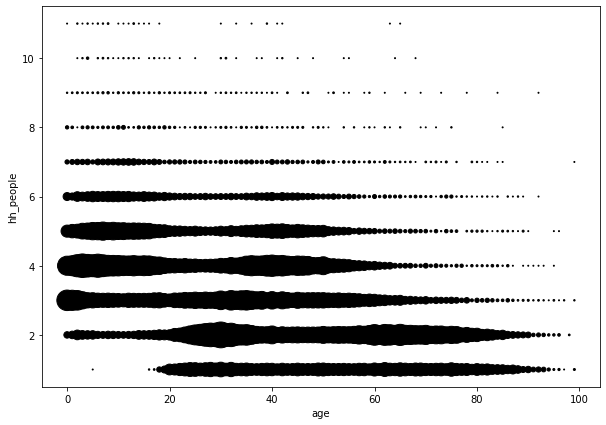

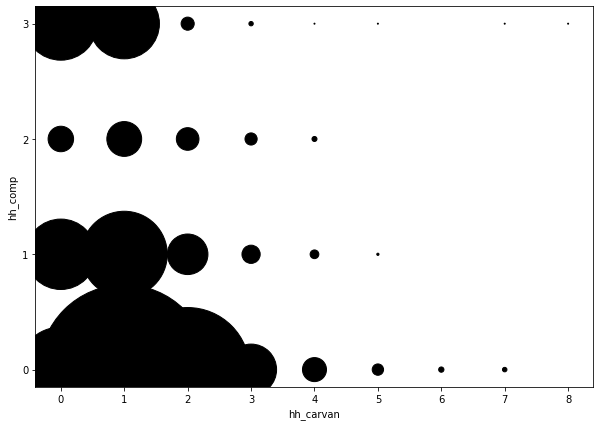

In [6]:
datgan.advise(df, graph, plot_graphs=True)

In [7]:
name = 'DATGAN'

In [8]:
output_folder = './output/{}/'.format(name)

In [9]:
datgan = DATGAN(output=output_folder,
                loss_function='WGAN',
                batch_size=2285,
                num_epochs=1000)

In [10]:
datgan.fit(df, data_info, graph, preprocessed_data_path='./output/encoded')

Preprocessed data have been loaded!
Start training DATGAN with the WGAN loss (15/06/2022 22:06:51).
Restored models from epoch 1000.


Training DATGAN: 0it [00:00, ?it/s]

DATGAN has finished training (15/06/2022 22:06:52) - Training time: 00 second


# Sampling

In [ ]:
samp = datgan.sample(len(df))
samp.to_csv('../../data/synthetic/DATGAN.csv', index=False)

In [11]:
boroughs = ['Camden', 'City of London', 'Hackney', 'Haringey', 'Islington', 'Kensington and Chelsea', 'Lambeth', 'Lewisham', 'Newham', 'Southwark', 'Tower Hamlets', 'Wandsworth', 'Westminster', 'Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Kingston upon Thames', 'Merton', 'Redbridge', 'Richmond upon Thames', 'Sutton', 'Waltham Forest', 'Hammersmith and Fulham']

In [12]:
nbrs = {}
dct = {}

for r in boroughs:
    tmp = pd.read_csv('../../data/nomis/{}.csv'.format(r))

    nbrs[r] = len(tmp)
    dct[r] = []

In [13]:
remaining_boroughs = set(boroughs)

count = 1
while remaining_boroughs:

    print("Pass {} - Remaining boroughs: {}".format(count, len(remaining_boroughs)))

    samp = datgan.sample(100000)

    region_to_remove = []

    for r in remaining_boroughs:
        tmp = samp[samp.hh_borough == r]

        if len(tmp) > nbrs[r]:
            tmp = tmp.sample(nbrs[r], replace=False)

        nbrs[r] -= len(tmp)
        dct[r].append(tmp)

        if nbrs[r] == 0:
            region_to_remove.append(r)


    for r in region_to_remove:
        remaining_boroughs.remove(r)

    count += 1

Pass 1 - Remaining regions: 33


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:03<00:00, 32767.83it/s]


Pass 2 - Remaining regions: 33


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 53055.98it/s]


Pass 3 - Remaining regions: 33


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 51392.48it/s]


Pass 4 - Remaining regions: 33


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 53449.83it/s]


Pass 5 - Remaining regions: 33


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 53318.28it/s]


Pass 6 - Remaining regions: 33


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 53234.19it/s]


Pass 7 - Remaining regions: 33


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:02<00:00, 49648.53it/s]


Pass 8 - Remaining regions: 33


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 53626.08it/s]


Pass 9 - Remaining regions: 33


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 53304.11it/s]


Pass 10 - Remaining regions: 33


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 53394.00it/s]


Pass 11 - Remaining regions: 33


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 53921.59it/s]


Pass 12 - Remaining regions: 33


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 53620.38it/s]


Pass 13 - Remaining regions: 33


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 53756.74it/s]


Pass 14 - Remaining regions: 33


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 54036.39it/s]


Pass 15 - Remaining regions: 33


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 53669.07it/s]


Pass 16 - Remaining regions: 33


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 53762.91it/s]


Pass 17 - Remaining regions: 33


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 53322.61it/s]


Pass 18 - Remaining regions: 33


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 53223.80it/s]


Pass 19 - Remaining regions: 33


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 53210.06it/s]


Pass 20 - Remaining regions: 33


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 53373.94it/s]


Pass 21 - Remaining regions: 33


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 53538.01it/s]


Pass 22 - Remaining regions: 33


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 52654.14it/s]


Pass 23 - Remaining regions: 33


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:02<00:00, 49565.51it/s]


Pass 24 - Remaining regions: 33


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 53425.47it/s]


Pass 25 - Remaining regions: 33


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 53341.19it/s]


Pass 26 - Remaining regions: 33


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 53591.88it/s]


Pass 27 - Remaining regions: 33


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 53275.97it/s]


Pass 28 - Remaining regions: 33


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 53801.28it/s]


Pass 29 - Remaining regions: 33


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 53924.23it/s]


Pass 30 - Remaining regions: 33


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 53506.56it/s]


Pass 31 - Remaining regions: 33


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 53720.44it/s]


Pass 32 - Remaining regions: 33


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 53577.69it/s]


Pass 33 - Remaining regions: 33


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 53462.01it/s]


Pass 34 - Remaining regions: 33


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 53379.51it/s]


Pass 35 - Remaining regions: 33


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 52659.85it/s]


Pass 36 - Remaining regions: 33


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 52326.19it/s]


Pass 37 - Remaining regions: 33


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 50393.55it/s]


Pass 38 - Remaining regions: 33


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 50292.80it/s]


Pass 39 - Remaining regions: 33


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 53786.35it/s]


Pass 40 - Remaining regions: 33


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 53506.58it/s]


Pass 41 - Remaining regions: 33


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 51256.88it/s]


Pass 42 - Remaining regions: 33


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 53001.89it/s]


Pass 43 - Remaining regions: 33


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 53734.76it/s]


Pass 44 - Remaining regions: 33


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 52161.60it/s]


Pass 45 - Remaining regions: 33


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 52819.67it/s]


Pass 46 - Remaining regions: 33


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 52353.82it/s]


Pass 47 - Remaining regions: 33


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 52785.44it/s]


Pass 48 - Remaining regions: 33


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 52869.93it/s]


Pass 49 - Remaining regions: 33


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 52654.17it/s]


Pass 50 - Remaining regions: 33


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 52930.65it/s]


Pass 51 - Remaining regions: 33


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 52986.10it/s]


Pass 52 - Remaining regions: 33


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 53167.93it/s]


Pass 53 - Remaining regions: 33


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 53405.33it/s]


Pass 54 - Remaining regions: 33


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 53125.87it/s]


Pass 55 - Remaining regions: 33


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 53524.77it/s]


Pass 56 - Remaining regions: 32


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 53069.96it/s]


Pass 57 - Remaining regions: 32


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 50229.75it/s]


Pass 58 - Remaining regions: 31


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 52958.45it/s]


Pass 59 - Remaining regions: 31


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 53167.90it/s]


Pass 60 - Remaining regions: 30


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 53308.50it/s]


Pass 61 - Remaining regions: 30


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 52709.25it/s]


Pass 62 - Remaining regions: 30


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 52295.41it/s]


Pass 63 - Remaining regions: 30


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 52706.86it/s]


Pass 64 - Remaining regions: 29


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 50292.71it/s]


Pass 65 - Remaining regions: 28


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 50703.53it/s]


Pass 66 - Remaining regions: 28


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 53506.58it/s]


Pass 67 - Remaining regions: 28


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 53526.22it/s]


Pass 68 - Remaining regions: 28


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 53449.85it/s]


Pass 69 - Remaining regions: 28


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 53398.15it/s]


Pass 70 - Remaining regions: 28


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 52968.37it/s]


Pass 71 - Remaining regions: 28


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 52722.99it/s]


Pass 72 - Remaining regions: 27


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 52577.54it/s]


Pass 73 - Remaining regions: 27


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 52667.93it/s]


Pass 74 - Remaining regions: 26


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 51608.40it/s]


Pass 75 - Remaining regions: 24


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 50739.55it/s]


Pass 76 - Remaining regions: 24


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:02<00:00, 45871.70it/s]


Pass 77 - Remaining regions: 23


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 50991.66it/s]


Pass 78 - Remaining regions: 22


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:02<00:00, 48804.82it/s]


Pass 79 - Remaining regions: 20


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 51467.84it/s]


Pass 80 - Remaining regions: 19


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:02<00:00, 45002.88it/s]


Pass 81 - Remaining regions: 19


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:02<00:00, 43479.13it/s]


Pass 82 - Remaining regions: 18


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 51118.82it/s]


Pass 83 - Remaining regions: 18


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 52428.03it/s]


Pass 84 - Remaining regions: 17


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 53462.81it/s]


Pass 85 - Remaining regions: 16


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 54003.56it/s]


Pass 86 - Remaining regions: 16


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 53544.19it/s]


Pass 87 - Remaining regions: 15


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 52640.40it/s]


Pass 88 - Remaining regions: 14


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 52800.59it/s]


Pass 89 - Remaining regions: 14


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 53260.43it/s]


Pass 90 - Remaining regions: 14


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 53072.49it/s]


Pass 91 - Remaining regions: 14


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 51102.53it/s]


Pass 92 - Remaining regions: 13


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 51259.45it/s]


Pass 93 - Remaining regions: 10


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 54387.05it/s]


Pass 94 - Remaining regions: 9


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 54293.37it/s]


Pass 95 - Remaining regions: 9


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 54194.76it/s]


Pass 96 - Remaining regions: 9


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 53483.11it/s]


Pass 97 - Remaining regions: 9


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 54562.12it/s]


Pass 98 - Remaining regions: 9


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 54524.90it/s]


Pass 99 - Remaining regions: 9


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 54157.69it/s]


Pass 100 - Remaining regions: 9


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 54830.75it/s]


Pass 101 - Remaining regions: 9


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 50643.75it/s]


Pass 102 - Remaining regions: 9


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 53447.01it/s]


Pass 103 - Remaining regions: 9


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 54517.79it/s]


Pass 104 - Remaining regions: 9


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 55006.36it/s]


Pass 105 - Remaining regions: 8


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 54139.09it/s]


Pass 106 - Remaining regions: 7


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 54622.79it/s]


Pass 107 - Remaining regions: 7


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 54460.49it/s]


Pass 108 - Remaining regions: 5


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 55083.57it/s]


Pass 109 - Remaining regions: 4


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 54870.84it/s]


Pass 110 - Remaining regions: 4


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 53738.65it/s]


Pass 111 - Remaining regions: 4


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 53803.05it/s]


Pass 112 - Remaining regions: 4


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 54563.52it/s]


Pass 113 - Remaining regions: 4


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 54475.21it/s]


Pass 114 - Remaining regions: 4


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 54039.65it/s]


Pass 115 - Remaining regions: 4


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 53913.37it/s]


Pass 116 - Remaining regions: 4


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 53655.42it/s]


Pass 117 - Remaining regions: 4


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 52359.84it/s]


Pass 118 - Remaining regions: 3


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 52312.61it/s]


Pass 119 - Remaining regions: 3


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 51451.34it/s]


Pass 120 - Remaining regions: 3


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 54240.72it/s]


Pass 121 - Remaining regions: 3


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 54406.22it/s]


Pass 122 - Remaining regions: 3


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 54670.64it/s]


Pass 123 - Remaining regions: 3


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 54915.12it/s]


Pass 124 - Remaining regions: 3


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 54726.58it/s]


Pass 125 - Remaining regions: 2


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 54878.31it/s]


Pass 126 - Remaining regions: 2


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 54401.73it/s]


Pass 127 - Remaining regions: 2


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 55072.95it/s]


Pass 128 - Remaining regions: 2


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 55121.06it/s]


Pass 129 - Remaining regions: 1


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 54949.87it/s]


Pass 130 - Remaining regions: 1


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 53421.52it/s]


Pass 131 - Remaining regions: 1


Sampling from DATGAN: 100%|██████████| 100000/100000 [00:01<00:00, 53259.18it/s]


In [14]:
for r in dct.keys():
    tmp = pd.concat(dct[r])
    tmp.to_csv('../../data/DATGAN/{}.csv'.format(r), index=False)